In [1]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute, assemble, QuantumRegister, ClassicalRegister
from qiskit.tools.monitor import job_monitor
import matplotlib as mpl
# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
from numpy import pi

In [2]:
# Initializing the Qubits

ql = QuantumRegister(3, name="ql") # logic qubits
qa = QuantumRegister(2, name="qa") # Ancilla qubits
mea = ClassicalRegister(3, name="mea")
syn = ClassicalRegister(2, name="syn")
qec_circuit = QuantumCircuit(ql,qa,mea,syn)


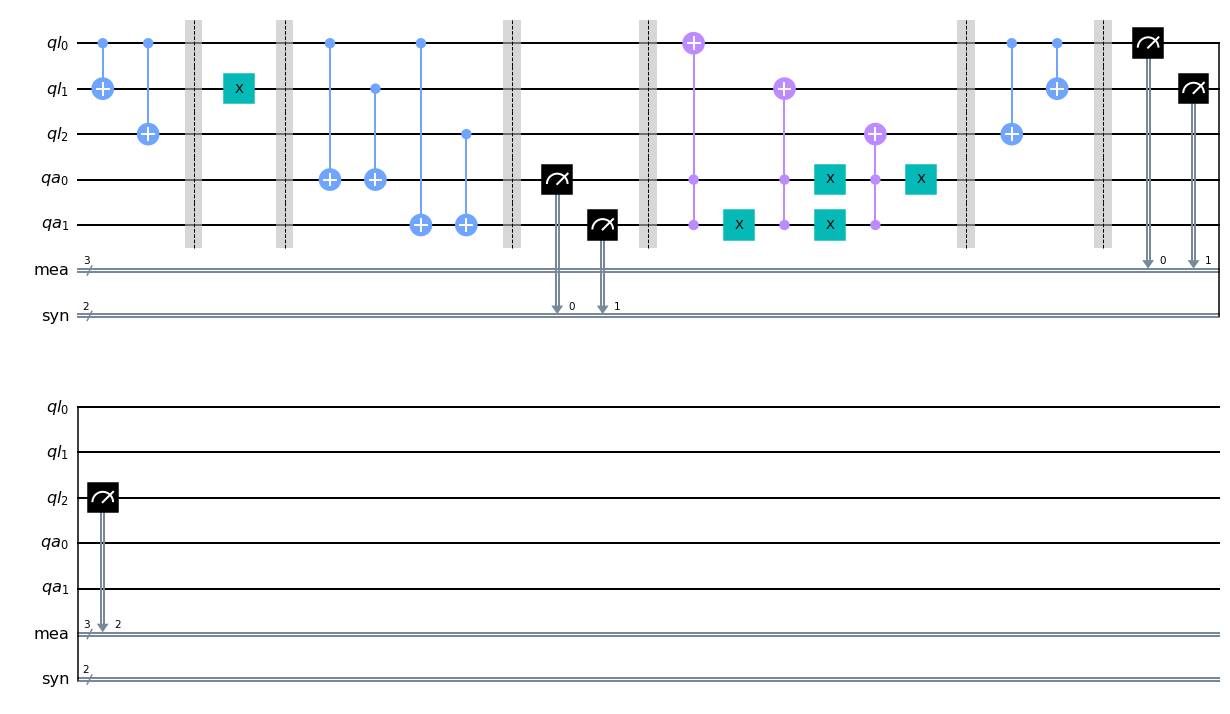

In [26]:
# Encoding

qec_circuit.clear()

qec_circuit.cx(0,1)
qec_circuit.cx(0,2)
qec_circuit.barrier()

# Bit flip error
    
n = np.random.randint(3)
qec_circuit.x(n)

qec_circuit.barrier()

# Syndrome Circuit

qec_circuit.cx(0,3)
qec_circuit.cx(1,3)
qec_circuit.cx(0,4)
qec_circuit.cx(2,4)
qec_circuit.barrier()

qec_circuit.measure(qa,syn)

# Recovery cirucit

qec_circuit.barrier()
qec_circuit.mct([3,4],0)
qec_circuit.x(4)
qec_circuit.mct([3,4],1)
qec_circuit.x(4)
qec_circuit.x(3)
qec_circuit.mct([3,4],2)
qec_circuit.x(3)
qec_circuit.barrier()

# Decoding circuit

qec_circuit.cx(0,2)
qec_circuit.cx(0,1)
qec_circuit.barrier()

# measurement

qec_circuit.measure(ql,mea)
qec_circuit.draw("mpl")
    


qec_circuit.draw('mpl')

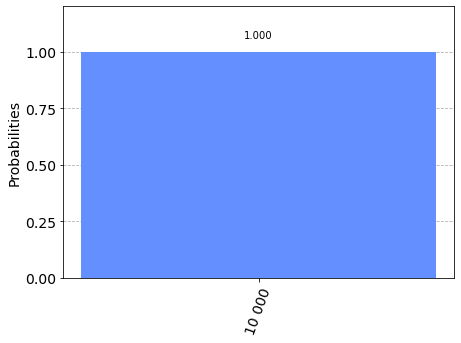

In [17]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
t_qec = execute(qec_circuit, aer_sim, shots=shots).result()
counts = t_qec.get_counts()

plot_histogram(counts)